# A Gentle Introduction to the Law of Large Numbers in Machine Learning

by Jason Brownlee on August 8, 2019.[](https://machinelearningmastery.com/a-gentle-introduction-to-the-law-of-large-numbers-in-machine-learning/) in [Statistics](https://machinelearningmastery.com/category/statistical-methods/)

We have an intuition that more observations is better.

This is the same intuition behind the idea that if we collect more data, our sample of data will be more representative of the problem domain.

There is a theorem in statistics and probability that supports this intuition that is a pillar of both of these fields and has important implications in applied machine learning. The __name of this theorem is the law of large numbers__.

After completing this tutorial, you will know:

- The law of large numbers supports the intuition that the sample becomes more representative of the population as its size is increased.
- How to develop a small example in Python to demonstrate the decrease in error from the increase in sample size.
- The law of large numbers is critical for understanding the selection of training datasets, test datasets, and in the evaluation of model skill in machine learning.

## Tutorial Overview
This tutorial is divided into 3 parts; they are:

1. Law of Large Numbers
    - 1.1 Independent and Identically Distributed
    - 1.2 Regression to the Mean
    - 1.3 Law of Truly Large Numbers
2. Worked Example
3. Implications in Machine Learning

## 1. Law of Large Numbers
The law of large numbers is a theorem from probability and statistics that suggests that the average result from repeating an experiment multiple times will better approximate the true or expected underlying result.

We can think of a trial of an experiment as one observation. The standalone and independent repetition of the experiment will perform multiple trials and lead to multiple observations. All sample observations for an experiment are drawn from an idealized population of observations.

- __Observation__: Result from one trial of an experiment.
- __Sample__: Group of results gathered from separate independent trials.
- __Population__: Space of all possible observations that could be seen from a trial.

>Using these terms from statistics, we can say that as the size of the sample increases, the mean value of the sample will better approximate the mean or expected value in the population. As the sample size goes to infinity, the sample mean will converge to the population mean.

### 1.1 Independent and Identically Distributed
It is important to be clear that the observations in the sample must be independent.

This means that the trial is run in an identical manner and does not depend on the results of any other trial.

In statistics, this expectation is called “__independent and identically distributed__”, or __IID__, iid, or i.i.d. for short. This is to ensure that the samples are indeed drawn from the same underlying population distribution.

### 1.2 Regression to the Mean
The law of large numbers helps us understand why we cannot trust a single observation from an experiment in isolation.

The law reminds us to repeat the experiment in order to develop a large and representative sample of observations before we start making inferences about what the result means.

As we increase the sample size, the finding or mean of the sample will move back toward the population mean, back toward the true underlying expected value. This is called __regression to the mean__ or sometimes reversion to the mean.

It is why we must be skeptical of inferences from small sample sizes, called small n.

### 1.3 Law of Truly Large Numbers
This is the idea that when we start investigating or working with extremely large samples of observations, we increase the likelihood of seeing something strange. That by having so many samples of the underlying population distribution, the sample will contain some astronomically rare events.

Again, we __must be wary not to make inferences from single cases__.

## 2. Worked Example
First, we can design an idealized underlying distribution. We will use a Gaussian distribution with a mean of 50 and a standard deviation of 5. The expected value or mean of this population is therefore 50.

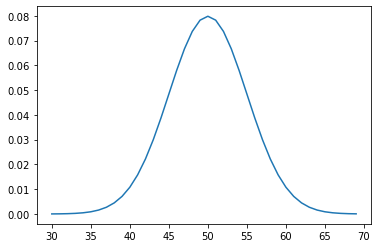

In [1]:
# idealized population distribution
from numpy import arange
from matplotlib import pyplot
from scipy.stats import norm

# x-axis for the plot
xaxis = arange(30, 70, 1)

# y-axis for the plot
yaxis = norm.pdf(xaxis, 50, 5)

# plot ideal population
pyplot.plot(xaxis, yaxis)
pyplot.show()

### 2.1 Independent random samples

We can create samples of different sizes and calculate the mean. Given our intuition and the law of large numbers, we expect that as the size of the sample is increased, the sample mean will better approximate the population mean.

[49.5142955459695, 50.371593294898695, 50.2919653390298, 50.1521157689338, 50.03955033528776]
[-0.48570445  0.37159329  0.29196534  0.15211577  0.03955034]


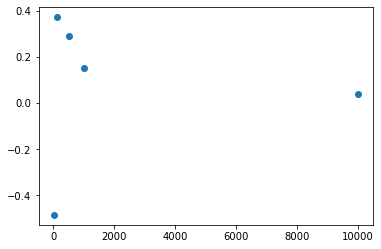

In [2]:
# demonstrate the law of large numbers
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import array
from matplotlib import pyplot

# seed the random number generator
seed(1)

# sample sizes
sizes = [10, 100, 500, 1000, 10000]

# generate samples of different sizes and calculate their means
means = [mean(5 * randn(size) + 50) for size in sizes]
print(means)
print(array(means)-50)

# plot sample mean error vs sample size
pyplot.scatter(sizes, array(means)-50)
pyplot.show()

## 3. Implications in Machine Learning

### 3.1 Training Data
The data used to train the model __must be representative__ of the observations from the domain.

This really means that it must contain enough information to generalize to the true unknown and underlying distribution of the population.

### 3.2 Test Data
The thoughts given to the training dataset must also be given to the test dataset.

This is often neglected with the blind use of 80/20 spits for train/test data or the blind use of 10-fold cross-validation, even on datasets where the size of 1/10th of the available data may not be a suitable representative of observations from the problem domain.

### 3.3 Model Skill Evaluation
Consider the law of large numbers when presenting the estimated skill of a model on unseen data.

It provides a defense for not simply reporting or proceeding with a model based on a skill score from a single train/test evaluation.